In [ ]:
from ur_control import transformations as tr
import quaternion as Q
from pyquaternion import Quaternion
import importlib
importlib.reload(tr)
import numpy as np
from scipy.spatial.transform import Rotation

In [ ]:
a = np.array([0.5,0.,0.,0.,0.,0.])
b = np.array([0.,0.5,0.5,0.,0.,0.])
c = np.array([0.5,0.5,0.5,0.,0.,0.])

print(np.linalg.norm(a), np.linalg.norm(b), np.linalg.norm(c))
print(np.average(a), np.average(b), np.average(c))

In [ ]:
# q1 = tr.random_quaternion()
# q2 = tr.random_quaternion()
q1 = [-0.05, 0.50, 0.50, 0.50]
# q1 = [0.74295004, 0.02290942, 0.62436794, 0.24013553]
# q2 = [-0.50433, 0.49562, 0.50436, 0.49561]
# q1 = np.array([0, 0, 0, 1])  # Identity quaternion
q2 = tr.rotate_quaternion_by_rpy(0, 0, np.deg2rad(10), [-0.05, 0.50, 0.50, 0.50])
dt = 0.05

In [ ]:
print(q1, q2)


In [ ]:
def w1(q1, q2, dt):
    delta_q = (tr.quaternion_multiply(q1, tr.quaternion_conjugate(q2)))
    delta_q_len = np.linalg.norm(delta_q[:3])
    delta_q_angle = 2*np.arctan2(delta_q_len, delta_q[3])
    return delta_q[:3] * delta_q_angle / dt


def w2(q1, q2, dt):
    q1_ = Quaternion(np.roll(q1, 1))
    q2_ = Quaternion(np.roll(q2, 1))
    delta_q = q1_*q2_.conjugate
    axis = np.linalg.norm(delta_q.vector)
    angle = 2 * np.arctan2(axis, delta_q.w)
    return delta_q.vector * angle / dt

def w3(q1, q2, dt):
    q1_ = Quaternion(np.roll(q1, 1))
    q2_ = Quaternion(np.roll(q2, 1))
    delta_q = q1_ * q2_.conjugate
    axis = delta_q.vector
    angle = 2 * np.arccos(delta_q.w)
    return axis * angle / dt

def w4(q1_, q2_, dt):
    q1 = Quaternion(np.roll(q1_, -1))
    q2 = Quaternion(np.roll(q2_, -1))
    return (2 / dt) * np.array([
        q1[0]*q2[1] - q1[1]*q2[0] - q1[2]*q2[3] + q1[3]*q2[2],
        q1[0]*q2[2] + q1[1]*q2[3] - q1[2]*q2[0] - q1[3]*q2[1],
        q1[0]*q2[3] - q1[1]*q2[2] + q1[2]*q2[1] - q1[3]*q2[0]])

def check(q1_, q2_, w, dt):
    q1 = Quaternion(np.roll(q1_, 1))
    q2 = Quaternion(np.roll(q2_, 1))
    q1.integrate(w, dt)
    dq = q2 * q1.conjugate
    angle = 2 * np.arccos(dq.w)
    return np.rad2deg(angle)
    
dt = 0.1
print("q2", q2)
print(w1(q1,q2,dt), tr.integrateUnitQuaternionDMM2(q1, w1(q1,q2,dt), dt))
print(w2(q1,q2,dt), check(q1, q2, w2(q1,q2,dt), dt))
print(w3(q1,q2,dt), check(q1, q2, w3(q1,q2,dt), dt))
print(w4(q1,q2,dt), check(q1, q2, w4(q1,q2,dt), dt))


In [ ]:
a1 = tr.angular_velocity_from_quaternions(q1, q2, dt)
a3 = tr.quaternion_to_angular_velocity(q1, q2, dt)
a4 = tr.angular_velocities(q1, q2, dt)
print(a1, tr.integrateUnitQuaternionDMM(q1, a1, dt))
print(a1, tr.integrateUnitQuaternionDMM2(q1, a1, dt))
# print(a3, tr.integrateUnitQuaternionDMM(q1, a3, dt))
# print(a4)





In [ ]:
# import numpy as np


# def quaternion_to_angular_velocity(q1, q2, dt):
#     """
#     Computes the angular velocity between two unit quaternions.

#     Args:
#         q1 (np.ndarray): A 4-element array representing the first unit quaternion.
#         q2 (np.ndarray): A 4-element array representing the second unit quaternion.
#         dt (float): The time difference between the two quaternions.

#     Returns:
#         np.ndarray: A 3-element array representing the angular velocity.
#     """
#     # Compute the quaternion difference
#     q_diff = np.quaternion(*q2) * np.quaternion(*q1).conjugate()

#     # Compute the axis-angle representation of the quaternion difference
#     axis = np.array([q_diff.x, q_diff.y, q_diff.z])
#     print(axis)
#     angle = 2.0 * np.arccos(q_diff.w)
#     print(angle)

#     # Compute the angular velocity from the axis-angle representation
#     angular_velocity = axis * angle / dt

#     return angular_velocity


# def rotate(q, w, dt):
#     q = q
#     Sq = np.array([[-q[1], -q[2], -q[3]],
#                    [q[0], -q[3], q[2]],
#                    [q[3], q[0], -q[1]],
#                    [-q[2], q[1], q[0]]])
#     return np.matmul(dt/2 * Sq, np.array(w).transpose()) + q


# # Example usage
# q1 = np.array([1, 0, 0, 0])  # Identity quaternion
# # q1 = np.roll([-0.05, 0.50, 0.50, 0.50], 1)
# q2 = tr.rotate_quaternion_by_rpy(0, 0, np.deg2rad(1), [0, 0, 0, 1])

# angular_velocity = np.array([0, 0, np.deg2rad(10)])  # 90 degree rotation per second around z-axis
# dt = 1  # Time step of 0.1 seconds

# # Integrate the angular velocity to obtain the new quaternion
q2_integrated = np.quaternion(1, *(angular_velocity * dt)) * np.quaternion(*q1)
# q2_integrated2 = rotate(q1, angular_velocity, dt)

# # Compute the actual quaternion using the angular velocity and compare to the expected quaternion
# q2_expected = np.quaternion(*np.roll(q2, 1))
# print("q2 integrated:", q2_integrated)
# print("q2 integrated2:", q2_integrated2)
# print("q2 expected:  ", q2_expected)
# print("diff", q2_integrated * q2_expected.conjugate())

# # Compute the angular velocity between q1 and q2_expected
# angular_velocity_computed = quaternion_to_angular_velocity(q1, q2_expected.components, dt)
# print("angular velocity computed:  ", angular_velocity_computed)
# print("angular velocity expected:  ", angular_velocity)


In [2]:
import numpy as np
a = np.load("/root/o2ac-ur/results/cucumber_filtered_01.npy")
b = np.load("/root/o2ac-ur/results/potato_filtered_01.npy")
c = np.load("/root/o2ac-ur/results/tomato_filtered_01.npy")

print(a[-1][6] - a[0][6])
print(b[-1][6] - b[0][6])
print(c[-1][6] - c[0][6])
print(a[:,6])

4.497954607009888
4.498033285140991
5.492011547088623
[-0.49986029 -0.4978888  -0.4958477  ...  3.99407697  3.99606323
  3.99809432]


In [15]:
duration = a[-1][6] - a[0][6]
a_end = int(2.35/duration*a.shape[0])
print("cucumber max force", a[:a_end,1].max())

duration = b[-1][6] - b[0][6]
b_end = int(2.35/duration*b.shape[0])
print("potato max force", b[:b_end,1].max())

duration = c[-1][6] - c[0][6]
c_end = int(2.35/duration*c.shape[0])
print("tomato max force", c[:c_end,1].max())

cucumber max force 12.036365647719114
potato max force 27.488895519611752
tomato max force 30.595279872956606


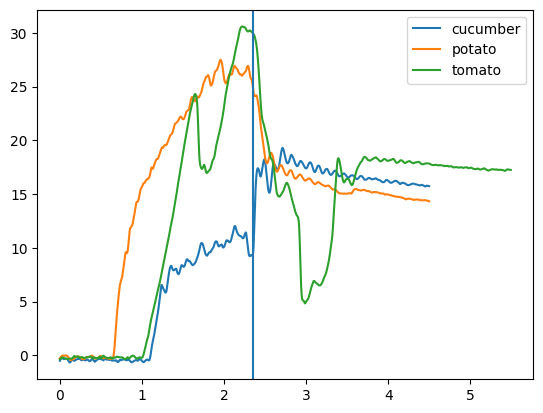

In [14]:
from cProfile import label
from matplotlib import pyplot as plt

plt.plot(a[:,6]-a[0,6], a[:,1], label="cucumber")
plt.plot(b[:,6]-b[0,6], b[:,1], label="potato")
plt.plot(c[:,6]-c[0,6], c[:,1], label="tomato")
plt.axvline(2.35)
plt.legend()

In [27]:
def plot(filename, save2png=False):
    data = np.load(filename)
    labels = ['x','y','z']
    x = data[:,6]-data[0,6]
    for i in range(3):
        y = data[:, i]
        plt.plot(x, y, label=labels[i])
    plt.plot(x, np.linalg.norm(data[:,:3], axis=1), color="black", label='norm', linestyle='--', alpha=0.5)
    plt.legend()
    title = '/'.join(filename.split("/")[-2:])
    plt.title(title)

    if save2png:
        to_file = filename.replace(".npy", ".png")
        print(to_file)
        plt.savefig(to_file)
    else:
        plt.show()
    plt.clf()


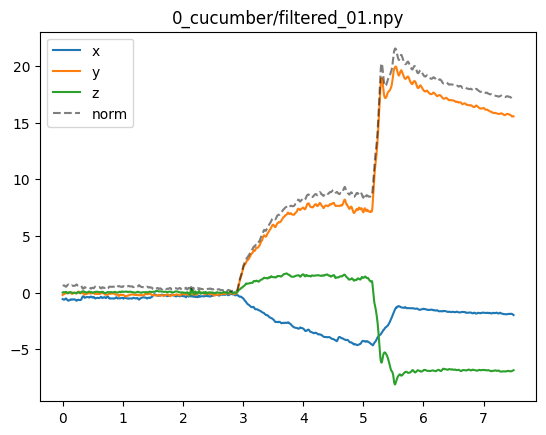

<Figure size 640x480 with 0 Axes>

In [28]:
import glob

npy_files = glob.glob("/root/o2ac-ur/results/data_slicing/_source/**/*.npy")
npy_files = sorted(npy_files)
for f in npy_files:
    plot(f, False)
    break

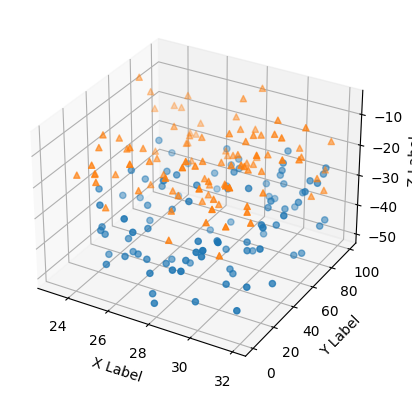

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [14]:
import numpy as np
X,Y = np.mgrid[0.15:2.1:0.1, 0.1:3.01:0.15]
xy = np.vstack((X.flatten(), Y.flatten())).T
print(X.shape, Y.shape)
print(xy.shape)
print(xy)


(20, 20) (20, 20)
(400, 2)
[[0.15 0.1 ]
 [0.15 0.25]
 [0.15 0.4 ]
 [0.15 0.55]
 [0.15 0.7 ]
 [0.15 0.85]
 [0.15 1.  ]
 [0.15 1.15]
 [0.15 1.3 ]
 [0.15 1.45]
 [0.15 1.6 ]
 [0.15 1.75]
 [0.15 1.9 ]
 [0.15 2.05]
 [0.15 2.2 ]
 [0.15 2.35]
 [0.15 2.5 ]
 [0.15 2.65]
 [0.15 2.8 ]
 [0.15 2.95]
 [0.25 0.1 ]
 [0.25 0.25]
 [0.25 0.4 ]
 [0.25 0.55]
 [0.25 0.7 ]
 [0.25 0.85]
 [0.25 1.  ]
 [0.25 1.15]
 [0.25 1.3 ]
 [0.25 1.45]
 [0.25 1.6 ]
 [0.25 1.75]
 [0.25 1.9 ]
 [0.25 2.05]
 [0.25 2.2 ]
 [0.25 2.35]
 [0.25 2.5 ]
 [0.25 2.65]
 [0.25 2.8 ]
 [0.25 2.95]
 [0.35 0.1 ]
 [0.35 0.25]
 [0.35 0.4 ]
 [0.35 0.55]
 [0.35 0.7 ]
 [0.35 0.85]
 [0.35 1.  ]
 [0.35 1.15]
 [0.35 1.3 ]
 [0.35 1.45]
 [0.35 1.6 ]
 [0.35 1.75]
 [0.35 1.9 ]
 [0.35 2.05]
 [0.35 2.2 ]
 [0.35 2.35]
 [0.35 2.5 ]
 [0.35 2.65]
 [0.35 2.8 ]
 [0.35 2.95]
 [0.45 0.1 ]
 [0.45 0.25]
 [0.45 0.4 ]
 [0.45 0.55]
 [0.45 0.7 ]
 [0.45 0.85]
 [0.45 1.  ]
 [0.45 1.15]
 [0.45 1.3 ]
 [0.45 1.45]
 [0.45 1.6 ]
 [0.45 1.75]
 [0.45 1.9 ]
 [0.45 2.05]
 [0.45 2.2 